### FILTROS DE REALCE: 
- Objetivo: 
    Realzar los detalles de una imagen que hayan podido quedar emborronados. 
    
- Estos filtros están asociados, por tanto, con la detección de lados o bordes. 
- La idea que subyace en la mayor parte de las técnicas de detección de bordes es el cálculo de un operador local de derivación ya que un píxel pertenece a un borde si se produce un cambio brusco entre niveles de grises con sus vecinos. 
        -Mientras más brusco sea el cambio, más fácil es detectar el borde. 
        -Inconveniente: El ruido es colateralmente realzado.


### Filtros de Borde Fundamentales:

-Sobel

-Laplaciano

-Canny

### Esencia de los filtros

Importo las librerías a utilizar para trabajar

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Primero trabajaremos con el filtro tipo Sobel, para ello, primero mostraremos un ejemplo de "juguete" para poder ver cómo opera la esencia de los filtros de borde más fundamentales.

Crearemos una matriz de 10 x 10 en donde las primeras 5 columnas están llenadas con "0" y las últimas 5 llenadas con "100".

In [2]:
Matriz = np.zeros(shape = (10,10))
Matriz[:, 5:] = 100
print(Matriz)

[[  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0. 100. 100. 100. 100. 100.]]


Defino el kernel para utilizar como filtro para la Matriz definida, un kernel derivativo horizontal capaz de detectar la diferencia entre píxeles vecinos horizontales.

In [3]:
Kernel_Derivativo_Horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
print(Kernel_Derivativo_Horizontal)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


Aplico la convolución entre la Matriz y el kernel utilizando OpenCV

In [4]:
Bordes = cv2.filter2D(src = Matriz, ddepth = cv2.CV_64F, kernel = Kernel_Derivativo_Horizontal)
print(Bordes)

[[  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 300. 300.   0.   0.   0.   0.]]


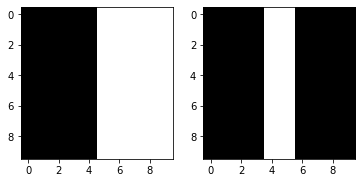

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].imshow(Matriz, cmap = 'gray')
ax[1].imshow(Bordes, cmap = 'gray')

### Filtro Sobel

Calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, para cada punto, este operador da la magnitud del mayor cambio posible, la dirección de este y el sentido desde oscuro a claro.

El filtro los gradientes de la imagen en ambas dimensiones, x e y. Luego, se puede calcular la resultante de ambos.

![Sobel](Sobel.jpg)


Para poder mostrar el funcionamiento de este filtro, cargaremos una imagen de monedas, y transformaremos la misma a monocroma.

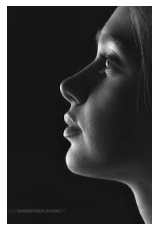

In [5]:
imagen = cv2.imread('./imagenes/rostro.jpeg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

plt.imshow(imagen, cmap = 'gray')
plt.axis('off')
plt.show()

OpenCV tiene una función integrada para poder trabajar con el filtro sobel en ambas direcciones.

Obtengo el gradiente de la imagen tanto en el eje de las x como en el de las y utilizando OpenCV con un tamaño de kernel de 3 x 3.

**Gradiente Sobel de la imagen del eje x**

In [6]:
sobelx = cv2.Sobel(src = imagen, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3) #1 0 indica sentido x, ksize: tamaño kernel

In [7]:
sobelx.dtype

dtype('float64')

**Gradiente Sobel de la imagen del eje y**

In [8]:
sobely = cv2.Sobel(imagen, cv2.CV_64F, dx = 0, dy = 1, ksize = 3) #0 1 indica sentido y, ksize: tamaño kernel

#### Imagen de Sobel x u Horizontal

(-0.5, 182.5, 274.5, -0.5)

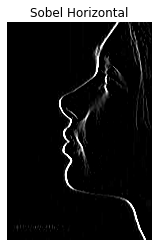

In [9]:
plt.imshow(sobelx, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Sobel Horizontal')
plt.axis('off')

#### Imagen de Sobel x u Horizontal intensificado

(-0.5, 182.5, 274.5, -0.5)

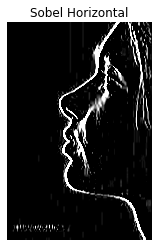

In [11]:
plt.imshow(5 * sobelx, cmap = 'gray', vmin = 0,vmax = 255)
plt.title('Sobel Horizontal')
plt.axis('off')

#### Imagen de Sobel y o Vertical

(-0.5, 182.5, 274.5, -0.5)

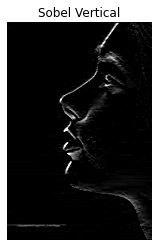

In [12]:
plt.imshow(sobely, cmap = 'gray', vmin = 0,vmax = 255)
plt.title('Sobel Vertical')
plt.axis('off')

#### Imagen de Sobel y o Vertical Intensificado

(-0.5, 182.5, 274.5, -0.5)

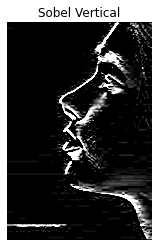

In [13]:
plt.imshow(5 * sobely, cmap = 'gray', vmin = 0,vmax = 255)
plt.title('Sobel Vertical')
plt.axis('off')

#### Imagen de Sobel Resultante

(-0.5, 182.5, 274.5, -0.5)

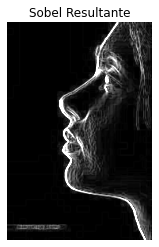

In [14]:
plt.imshow(np.sqrt(sobelx ** 2 + sobely ** 2), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Sobel Resultante')
plt.axis('off')

#### Imagen de Sobel Resultante Intensificada

(-0.5, 182.5, 274.5, -0.5)

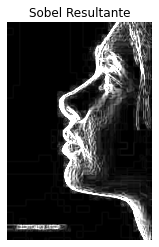

In [15]:
plt.imshow(np.sqrt(5 * sobelx ** 2 + 5 * sobely ** 2), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Sobel Resultante')
plt.axis('off')

### Filtro Laplaciano

A diferencia de los filtros mostrados anteriormente, utiliza un sólo kernel para detectar los bordes tanto en el eje x como en el eje y. Alguno de los kernels más utilizados para lograr este objetivo:

![Laplace](Kernel_Laplace.jpg)

In [16]:
laplacian = cv2.Laplacian(imagen, cv2.CV_64F)

#### Imagen filtrada con Laplaciano

(-0.5, 182.5, 274.5, -0.5)

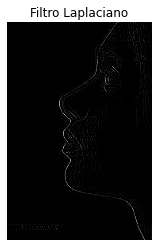

In [17]:
plt.imshow(laplacian, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Filtro Laplaciano')
plt.axis('off')

#### Imagen filtrada con Laplaciano Intensificada

(-0.5, 182.5, 274.5, -0.5)

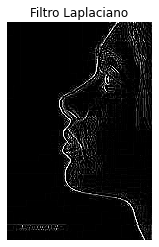

In [18]:
plt.imshow(5 * laplacian, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Filtro Laplaciano')
plt.axis('off')

Tiene la desventaja de ser muy sensible al ruido por la estructura del kernel utilizado, por lo que se recomienda primero suavizar la imagen antes de aplicar este filtro.

### Filtro de Canny

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

El detector de bordes Canny es un operador de detección de bordes que utiliza en multiples etapas diferentes algoritmos para optimizar la detección de los mismos.

Las etapas del operador son las siguientes:

1. Aplicación de filtro Gaussiano para suavizar la imagen.
2. Aplicar filtros derivativos para encontrar bordes.
3. Supresión de bordes para hacerlos más finos.
4. Filtración de píxeles de representación imprecisa de bordes, causados por ruido y variación de color de la imagen, por umbrales aleatorios.

In [35]:
imagen = cv2.imread("./imagenes/rostro.jpeg", 0)
umbrali = int(input('Ingrese umbral inferior: '))#80
umbrals = int(input('Ingrese umbral superior: '))#200
edges = cv2.Canny(image = imagen, threshold1 = umbrali, threshold2 = umbrals)

Ingrese umbral inferior:  80
Ingrese umbral superior:  200


(-0.5, 182.5, 274.5, -0.5)

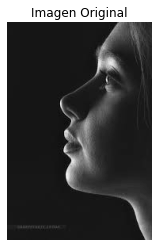

In [36]:
plt.imshow(imagen, cmap = 'gray')
plt.title('Imagen Original')
plt.axis('off')

(-0.5, 182.5, 274.5, -0.5)

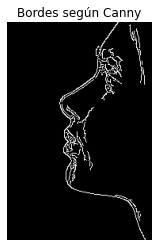

In [37]:
plt.imshow(edges, cmap = 'gray')
plt.title('Bordes según Canny')
plt.axis('off')

**Ejercicio**
Elegir una imagen.

Aplicarle suavizado gaussiano y luego el filtro laplaciano (LoG)

Repetir el ejercicio anterior, pero agregue ruido a la imagen antes de operar.